# Unwrap to disk

In [ ]:
import os
from skimage import io
import napari
import vedo
import numpy as np
from napari_stress import measurements, vectors

import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_process_points_and_surfaces as nppas
import pyclesperanto_prototype as cle
from napari_shape_odyssey import unwrapping

In [2]:
viewer = napari.Viewer()

Invalid schema for package 'napari-stl-exporter', please run 'npe2 validate napari-stl-exporter' to check for manifest errors.


In [3]:
root = r'C:\Users\johamuel\Desktop\test_surface_nuclei_unwrapping'
filename = r'Strausberg_Tribolium_LA-GFP_tailpole_run-C0opticsprefused-301-310.tif'

image = io.imread(os.path.join(root, filename))[:, :-2]

In [4]:
viewer.add_image(image[0], name='data', colormap='gray')

<Image layer 'data' at 0x22d8c70cb20>

In [5]:
image.shape

(10, 109, 1024, 1024)

In [6]:
image_binary = cle.threshold_otsu(image[0])
image_eroded = cle.opening_sphere(image_binary, radius_x=5, radius_y=5, radius_z=2)
image_closed = cle.closing_sphere(image_eroded, radius_x=5, radius_y=5, radius_z=2)
image_small_labels_removed = cle.exclude_small_labels(image_closed)
image_labelled = cle.connected_components_labeling_box(image_small_labels_removed)

# cheatcode:
image_labelled[-1] = 0


In [7]:
viewer.add_labels(image_labelled)

<Labels layer 'image_labelled' at 0x22d8db13eb0>

In [8]:
surface = nppas.label_to_surface(image_labelled, 1)
mesh = vedo.Mesh(surface).clean().smooth(50, pass_band=0.05, feature_angle=150, edge_angle=90, boundary=True).decimate(n=20000).clean()

(Mesh)0000022D8D7CE760
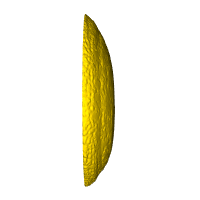

In [9]:
smoothed = vedo.Mesh((mesh.points(), mesh.faces()))
smoothed.smooth(feature_angle=10, edge_angle=10, boundary=True).clean()

In [10]:
intensities = measurements.measure_intensity_on_surface((smoothed.points(), np.asarray(smoothed.faces())), image[0],
                                          measurement_range=-64, sampling_distance=4, center=True)
mean_intensity = np.nanmean(intensities.values, axis=1)

viewer.add_surface((smoothed.points(), np.asarray(smoothed.faces()), mean_intensity), colormap='inferno')

<Surface layer 'Surface' at 0x22d8c70c040>

In [12]:
result = unwrapping.map_surface_to_disk((smoothed.points(), np.asarray(smoothed.faces()), mean_intensity),
                                        only_uvs=True)

new_values = np.zeros(len(result[0]))
new_values[:len(mean_intensity)] = mean_intensity
viewer.add_surface((result[0], result[1], new_values), colormap='inferno')

<Surface layer 'Surface [2]' at 0x1fa2885fd00>

In [13]:
result[0].shape

(20190, 3)

In [14]:
mean_intensity.shape

(20181,)

(Mesh)000001FA05651A60
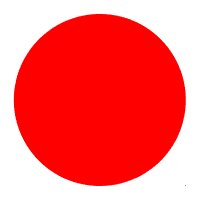

In [15]:
vedo.load(r'../../../src/napari_shape_odyssey/_unwrapping/mesh_out.obj').clean()

(Mesh)000001FA27074A00
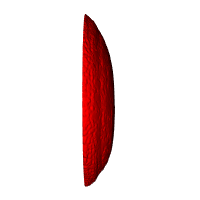

In [16]:
vedo.load(r'../../../src/napari_shape_odyssey/_unwrapping/mesh_in.obj').clean()

In [27]:
test_out = vedo.load(os.path.join(r'C:\Users\johamuel\Downloads\windows-v1.6', 'test_out.obj'))
test = vedo.load(os.path.join(r'C:\Users\johamuel\Downloads\windows-v1.6', 'test.obj'))

In [28]:
test.npoints

121567

In [29]:
test_out.npoints

122517